<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/PCA__Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis

Principle component analysis is a data reduction and analysis technique that is especially important in "large, mutidimensional datasets." [1,3] Reducing the dimensionality of the data to *principle component analysis* can help us better understand the patterns in the data by removing the "noise" from variables that do not contribue much to the understanding of the data structure.[2] 

By lowering the number of variables (components) that can exaplain the bigger part of the variance across the dataset, PCA maintains underlying signal in the dataset while allowing us to reduce variables that do not contribute to much of the variance in the dataset. 

Let's explore PCA in the following example using the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

[1] Jinhyun, J., Banfelder, J., & Skrabanek, L. (2017). Quantitative Understanding in Biology Principal Component Analysis. The Rockefeller University. Pág.

[2] Nguyen, L. H., & Holmes, S. (2019). Ten quick tips for effective dimensionality reduction. PLoS Computational Biology, 15(6), e1006907.

[3] Shlens, J. (2014). A Tutorial on Principal Component Analysis. ArXiv:1404.1100 [Cs, Stat]. http://arxiv.org/abs/1404.1100



In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pylab as pl

#getting the Iris dartaset from sklearn
#see details here: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris = datasets.load_iris()


Let's explore the Iris dataset. There's a data portion that includes 4 featuers. 

In [3]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

The four features are...

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The target is basically describing three different types of flowers: Iris setosa, Iris virginica and Iris versicolor

In [5]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Since we always like to work with Pandas DataFrames, let's set one up using this dataset

In [6]:
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Because we want to make the names of the columns easier for us (not to have to add the spaces and the "cm," let's rename our columns...

In [10]:
df.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width'}, inplace=True)

In [11]:
#these are the packages we use when plotting figures using Pandas DataFrames in a notebook. 
#check the introduction to Pandas for details (https://github.com/tawfiqam/MI564/blob/main/Pandas_Introduction.ipynb)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(10,8)})

Let's create a scatter plot with the x axis as sepal length, and the y axis as sepal width

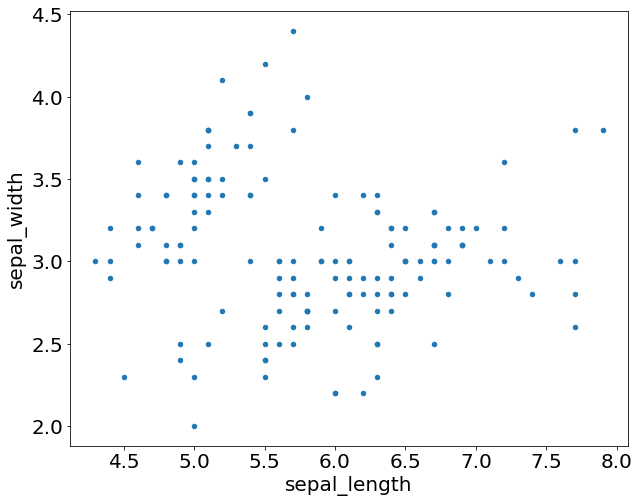

In [20]:
df.plot.scatter(x='sepal_length',y='sepal_width')

Now, let's color them to make things clearer. Do you see any patterns here? 

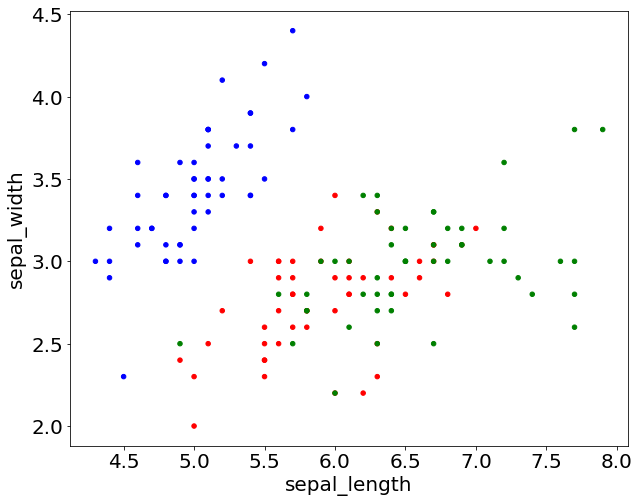

In [18]:
col = df.target.map({0.0:'b', 1.0:'r', 2.0:'g'})
df.plot.scatter(x='sepal_length',y='sepal_width',c=col)

##Enter PCA!

OK. Now, let's setup our PCA analysis here. 

In [12]:
#import the package
from sklearn import decomposition
#Set the number of components. In this example, we will stick with 2 for simplicity 
pca = decomposition.PCA(n_components=2)
#now, fit the data into your PCA
pca.fit(df[['sepal_length','sepal_width','petal_length','petal_width']])
#finally, transform so that we now have two principal components as opposed to our original df
T = pca.transform(df[['sepal_length','sepal_width','petal_length','petal_width']])

Let's take a look at T

In [15]:
T[0:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

Looks nothing like the original data set. Let's check to see what the distribution looks like

Text(0, 0.5, '2PC')

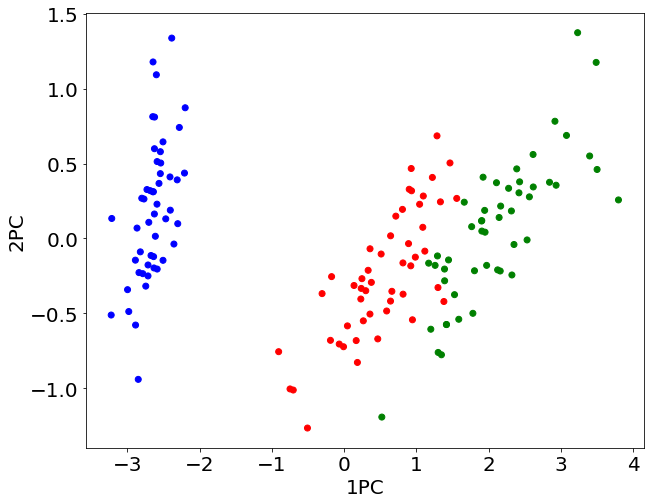

In [19]:
import pylab as pl
plt.scatter(T[:,0], T[:,1],c=col)

plt.xlabel('1PC')
plt.ylabel('2PC')

Compare this graph to the earlier one and you will see the three flower distributions are clearer here than they were in the earlier figure before we applied PCA to the dataset. 

##Interpreting PCA

OK. This will become a theme in this calss, but no sooner you find a cool way to look at your data, then the next thing that happens is you find the disadvantages in this new cool thing! Now, while our graph looks good, we don't really know why the distribution changed to look the way it does. In other way, we don't know ***why*** PCA gave us this result. 

Below, we will try to dig into this issue. First, let's see how our principle components look in relation to our data

In [21]:
# Append the principle components for each entry to the dataframe
#this way we can see them both next to each other
n_components = 2
for i in range(0, n_components):
    df['PC' + str(i + 1)] = T[:, i]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,PC1,PC2
0,5.1,3.5,1.4,0.2,0.0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0.0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0.0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0.0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0.0,-2.728717,0.326755


###Scree plot

The scree plot shows us the variance contribution of each of the principle components

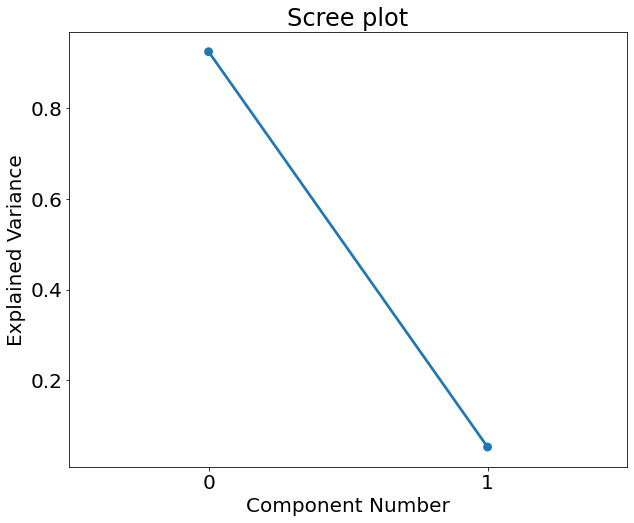

In [25]:
#this package will allow us to produce some better graphs
import seaborn as sns

# Do a scree plot
ind = np.arange(0, n_components)

(fig, ax) = plt.subplots(figsize=(10, 8))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()


So, most of the explained variance can be attributed to the first principle component. 

OK, but can we determine what original measurements are associated with each principle component? 

## Feature/factor maps or correlation circles

PCA reveals that 92.46% of the variance in our dataset can be represented in a 2-dimensional space. The dimension with the most explained variance is called Component 1 and plotted on the horizontal axes, the second-most explanatory dimension is called Component 2 and placed on the vertical axis. 

Inside the circle, the original 4 variables are projected in the 2-D component space: 

1.   If two arrows are pointing in the same direction then they are highly correlated: can you see two such variables in the figure below?
2.   If two arrows are pointing in opposite directions, that means they are negatively correlated.
3.   If two arrows are orthogonal, they are unrelated.


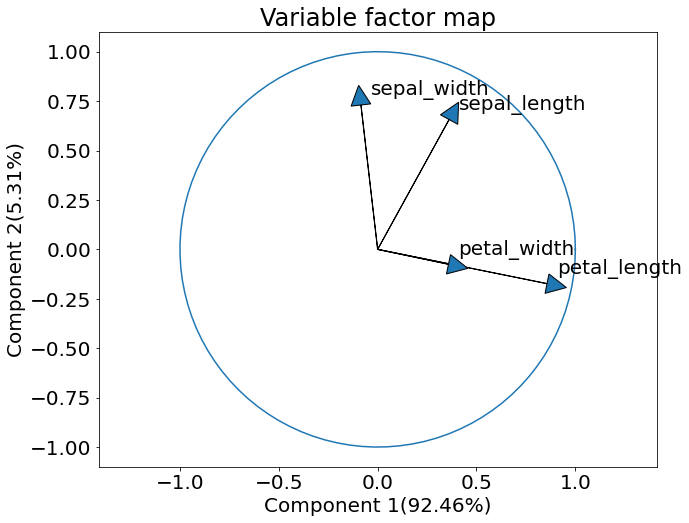

In [27]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(10, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])
    ax.set_xlabel(f'Component 1({round(pca.explained_variance_ratio_[0]*100,2)}%)')
    ax.set_ylabel(f'Component 2({round(pca.explained_variance_ratio_[1]*100,2)}%)')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()